In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

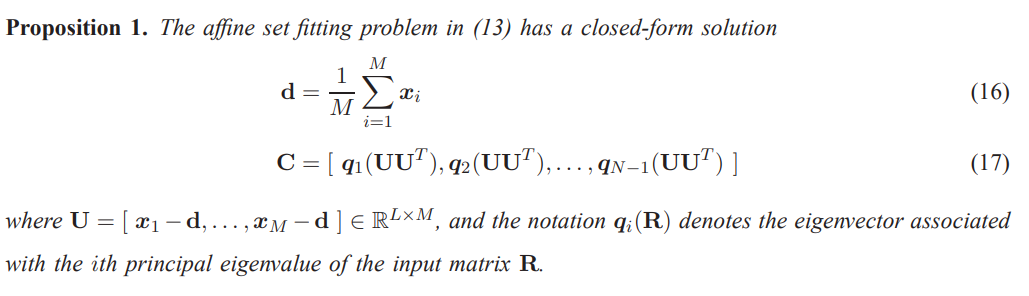

In [2]:
Image.open("proposition_1.png")

In [3]:
def proposition_1(X):
    d = X.mean(axis=1).reshape(-1, 1)
    U = X - np.tile(d, (1, X.shape[1]))
    C = U[:, :2]
    
    return C, d

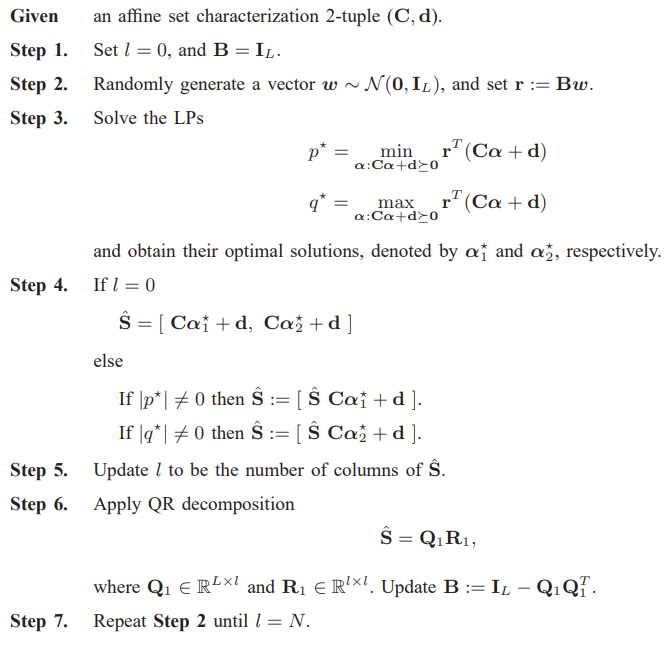

In [4]:
Image.open("CAMNS-LP.png")

In [5]:
def Step2(B, L):
    w = scp.stats.norm().rvs(L)        
    r = np.matmul(B, w)
    
    return r

In [6]:
def Step3(C, d, r, images_num=3):
    def fun(alpha):
        return np.matmul(r.T, (np.matmul(C, alpha) + d.flatten()))

    constraint = scp.optimize.LinearConstraint(C, lb=-d.flatten(), ub=np.ones(C.shape[0]) * np.inf)

    alpha_1 = scp.optimize.minimize(fun, 
                               x0=np.zeros(images_num - 1),
                               method='COBYLA',
                               constraints=constraint).x

    alpha_2 = scp.optimize.minimize(lambda x : -fun(x), 
                               x0=np.zeros(images_num - 1),
                               method='COBYLA',
                               constraints=constraint).x

    p = fun(alpha_1)
    q = fun(alpha_2)
    
    return p, q, alpha_1, alpha_2

In [7]:
def Step4(l, S, C, d, p, q, alpha_1, alpha_2):
    if l == 0:
        S = np.vstack((np.matmul(C, alpha_1) + d.T, np.matmul(C, alpha_2) + d.T)).T
    else:
        if abs(p) != 0:
            column = np.matmul(C, alpha_1) + d.T
            S = np.hstack((S, column.reshape(-1, 1)))
        elif abs(q) != 0:
            column = np.matmul(C, alpha_2) + d.T
            S = np.hstack((S, column.reshape(-1, 1)))
            
    return l, S, C, d

In [8]:
def Step5(S):
    return S.shape[1]

In [9]:
def Step6(S, L):
    Q1, R1 = np.linalg.qr(S)
    B = np.eye(L) - np.matmul(Q1, Q1.T)
    
    return B

In [10]:
def loop_steps(l, S, B, C, d, L, images_num=3):
    r = Step2(B, L)
    print("Step 2 done")

    p, q, alpha_1, alpha_2 = Step3(C, d, r)
    print("Step 3 done")

    l, S, C, d = Step4(l, S, C, d, p, q, alpha_1, alpha_2)
    print("Step 4 done")

    l = Step5(S)
    print("Step 5 done")

    B = Step6(S, L)
    print("Step 6 done")
    
    return l, S, B, C, d

In [11]:
def CAMNS_LP(C, d, L, images_num=3):
    
    # Step 1    
    l = 0
    B = np.eye(L)
    print("Step 1 done")
    
    # Steps 2-7
    S = None
    while l != images_num:
        l, S, B, C, d = loop_steps(l, S, B, C, d, L, images_num)
        print("Loop iteration done, l = ", l)
    
    print("All steps done")
    return S

In [12]:
def data_output(data, shape=(128, 128)):
    plt.figure(figsize=(20, 15))
    
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(data[:, i].reshape(shape) / 255)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

    plt.show()

In [13]:
data = ['ksiwek1.jpg', 'cao1.jpg', 'zhang1.jpg']
matrix_data = np.array([plt.imread(i).flatten() for i in data])

weights = np.array([
    [0.5, 0.2, 0.3],
    [0.3, 0.6, 0.1],
    [0.1, 0.2, 0.7]
])

original_data = np.matmul(matrix_data.T, np.eye(3))
shuffled_data = np.matmul(matrix_data.T, weights)

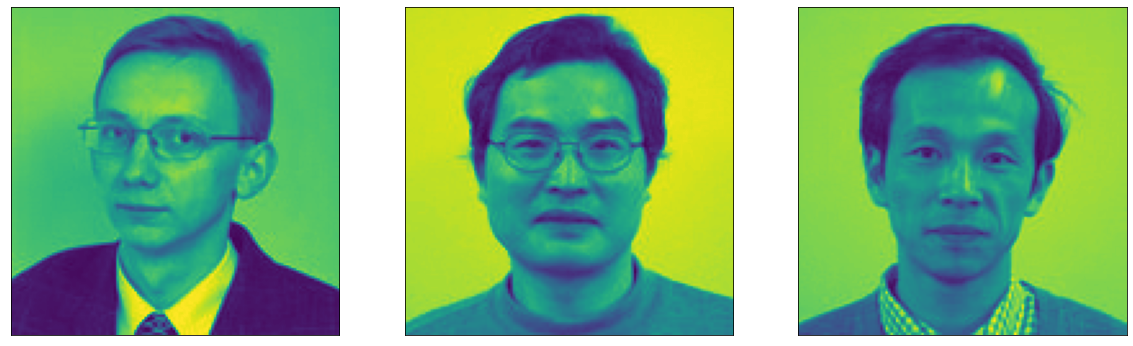

In [14]:
data_output(original_data)

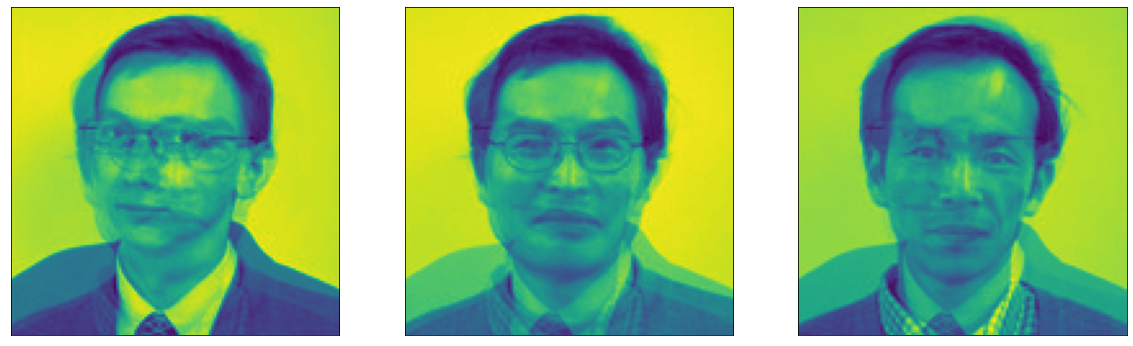

In [15]:
data_output(shuffled_data)

In [16]:
C, d = proposition_1(shuffled_data)
recovered_data = CAMNS_LP(C, d, shuffled_data.shape[0])

Step 1 done
Step 2 done
Step 3 done
Step 4 done
Step 5 done
Step 6 done
Loop iteration done, l =  2
Step 2 done
Step 3 done
Step 4 done
Step 5 done
Step 6 done
Loop iteration done, l =  3
All steps done


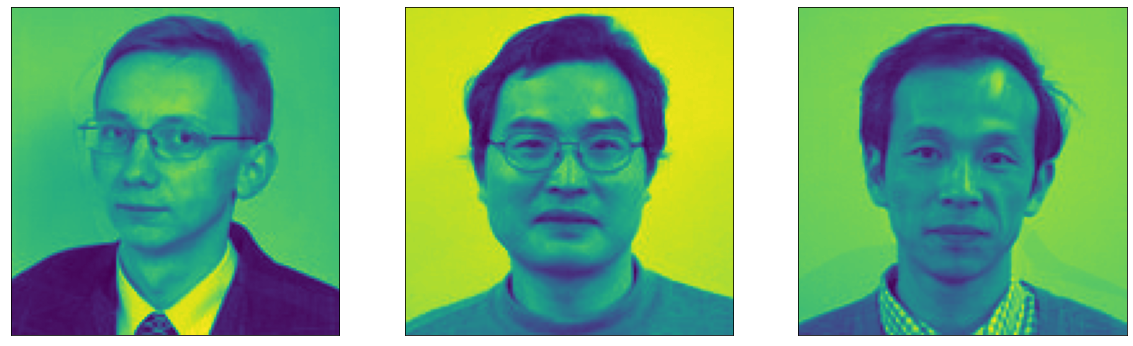

In [17]:
data_output(recovered_data)

In [13]:
# data = ['father_avokado.jpg', 'son_avokado.jpg', 'swag_avokado.jpg']
data = ['test1.jpg', 'test2.jpg', 'test3.jpg']
matrix_data = np.array([plt.imread(i).flatten() for i in data])

weights = np.array([
    [0.5, 0.2, 0.3],
    [0.3, 0.6, 0.1],
    [0.1, 0.2, 0.7]
])

original_data = np.matmul(matrix_data.T, np.eye(3))
shuffled_data = np.matmul(matrix_data.T, weights)

# shape = plt.imread('son_avokado.jpg').shape
shape = plt.imread('test1.jpg').shape

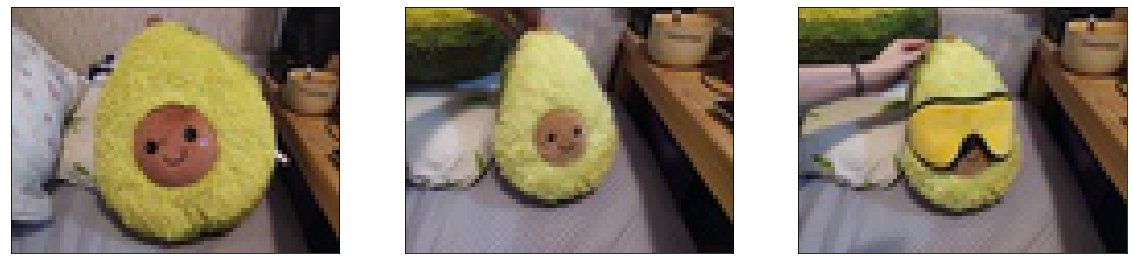

In [14]:
data_output(original_data, shape)

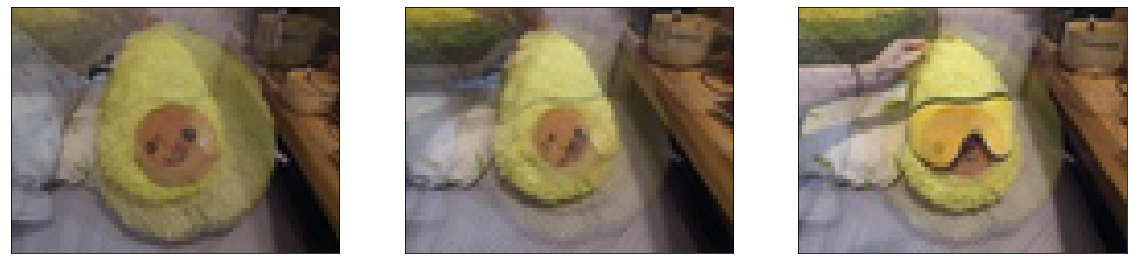

In [15]:
data_output(shuffled_data, shape)

In [16]:
C, d = proposition_1(shuffled_data)
recovered_data = CAMNS_LP(C, d, shuffled_data.shape[0])

Step 1 done
Step 2 done
Step 3 done
Step 4 done
Step 5 done
Step 6 done
Loop iteration done, l =  2
Step 2 done
Step 3 done
Step 4 done
Step 5 done
Step 6 done
Loop iteration done, l =  3
All steps done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


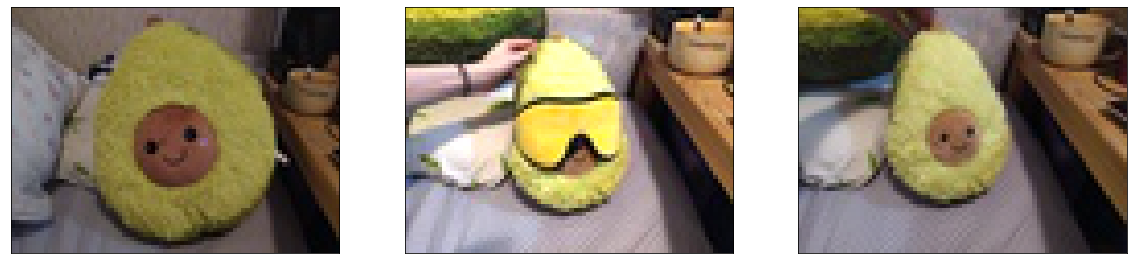

In [18]:
data_output(recovered_data, shape)